<a href="https://colab.research.google.com/github/LEESOOJAE1978/sjcu/blob/main/exe10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/sjcu/aerial-cactus-identification/"

In [ ]:
import pandas as pd

labels = pd.read_csv(data_path +'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [ ]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


타깃값 분포

([<matplotlib.patches.Wedge at 0x7f80fe6076d0>,
 [Text(-0.7793519565739234, 0.7762799287527649, 'Has cactus'),
  Text(0.7793519929142085, -0.776279892268666, "Hasn't cactus")],
 [Text(-0.42510106722213997, 0.42342541568332626, '75.1%'),
  Text(0.4251010870441137, -0.42342539578290866, '24.9%')])

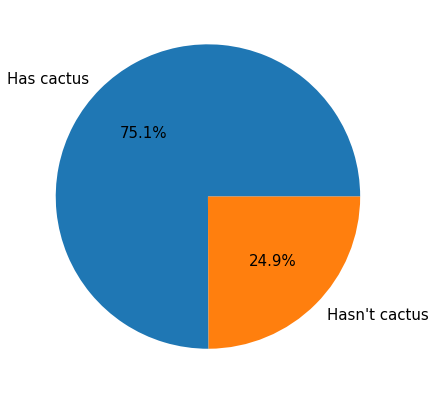

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))
label = ['Has cactus', 'Hasn\'t cactus']
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')

압축파일 풀기

In [ ]:
%cd /content/drive/My Drive/sjcu/aerial-cactus-identification/
!unzip -qq "/content/drive/My Drive/sjcu/aerial-cactus-identification/test.zip"

/content/drive/My Drive/sjcu/aerial-cactus-identification
replace test/000940378805c44108d287872b2f04ce.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test/001ee6d8564003107853118ab87df407.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
%cd /content/drive/My Drive/sjcu/aerial-cactus-identification/
!unzip -qq "/content/drive/My Drive/sjcu/aerial-cactus-identification/train.zip"

/content/drive/My Drive/sjcu/aerial-cactus-identification
replace train/008bd3d84a1145e154409c124de7cee9.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import os
num_train = len(os.listdir('/content/drive/My Drive/sjcu/aerial-cactus-identification/train'))
num_test = len(os.listdir('/content/drive/My Drive/sjcu/aerial-cactus-identification/test/'))

print(f'훈련데이터개수: {num_train}')
print(f'테스트데이터개수: {num_test}')

훈련데이터개수: 17500
테스트데이터개수: 4000


선인장 포함 이미지 출력

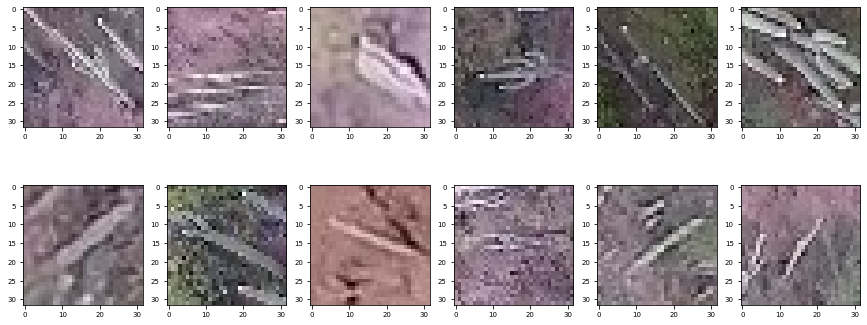

In [ ]:
import matplotlib.gridspec as gridspec
import cv2 # OpenCV 라이브러리 임포트

mpl.rc('font', size=7)
plt.figure(figsize=(15, 6))    # 전체 Figure 크기 설정
grid = gridspec.GridSpec(2, 6) # 서브플롯 배치(2행 6열로 출력)
    
# 선인장을 포함하는 이미지 파일명(마지막 12개) 
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-12:]

# 이미지 출력 
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = '/content/drive/My Drive/sjcu/aerial-cactus-identification/train/' + img_name                 # 이미지 파일 경로 
    image = cv2.imread(img_path)                   # 이미지 파일 읽기 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정 
    ax = plt.subplot(grid[idx])
    ax.imshow(image)   

선인장 없는 이미지 출력

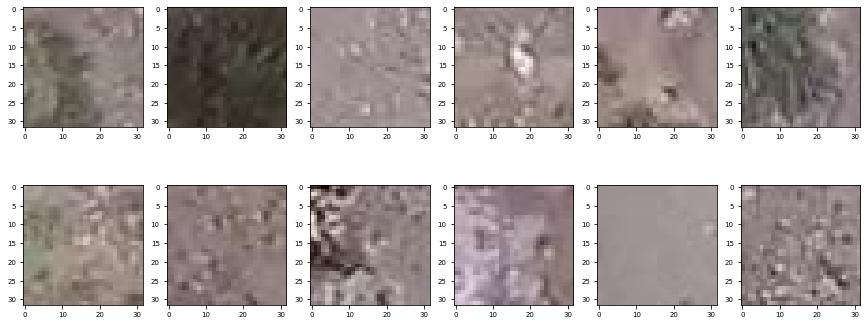

In [ ]:
mpl.rc('font', size=7)
plt.figure(figsize=(15,6)) #전체 Figure 크기 설정
grid=gridspec.GridSpec(2,6) #서브 플롯 배치(2행 6열로 출력)

last_hasnt_cactus_img_name = labels[labels['has_cactus']==0]['id'][-12:]

#이미지 출력
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
  img_path ='/content/drive/My Drive/sjcu/aerial-cactus-identification/train/' + img_name #이미지 파일 경로
  image = cv2.imread(img_path) #이미지 파일 읽기
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #이미지 색상 보정
  ax = plt.subplot(grid[idx])
  ax.imshow(image) #이미지 출력

In [ ]:
image.shape #이미지 가로, 세로 32 X 32 채널 3

(32, 32, 3)

시드값 고정 및 GPU 설정

In [ ]:
import torch
import random
import numpy as np
import os

seed = 50
os.environ['PYTHONHASSEED'] = str(seed)
random.seed(seed) #파이썬 난수 생성기 시드 고정
np.random.seed(seed) #넘파이 난수 생성기 시드 고정
torch.manual_seed(seed) #파이토치 난수 생성기 시드 고정(CPU 사용시)
torch.cuda.manual_seed(seed) #파이토치 난수 생성기 시드 고정(GPU사용시)
torch.cuda.manual_seed_all(seed) #파이토치 난수 생성기 시드 고정(멀티 GPU 사용시)
torch.backends.cudnn.determinstic =True #확정적 연산 사용
torch.backends.cudnn.benchmark = False #벤치마크 기능 해제
torch.backends.cudnn.enabled = False #cudnn 사용 해제

In [ ]:
#연산 장비 할당
if torch.cuda.is_available():
  device = torch.device('cuda') #compute unified device architecture
else:
  device = torch.device('cpu')

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
from zipfile import ZipFile

# 훈련 이미지 데이터 압축 풀기
with ZipFile(data_path + 'train.zip') as zipper:
    zipper.extractall()
    
# 테스트 이미지 데이터 압 풀기
with ZipFile(data_path + 'test.zip') as zipper:
    zipper.extractall()

훈련데이터 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(labels,
                                test_size = 0.1,
                                stratify = labels['has_cactus'],
                                random_state=50)

In [ ]:
print('훈련데이터 개수:', len(train))
print('검증데이터 개수:', len(valid))

훈련데이터 개수: 15750
검증데이터 개수: 1750


데이터셋 클래스 정의


In [ ]:
import cv2 # OpenCV 라이브러리
from torch.utils.data import Dataset # 데이터 생성을 위한 클래스

class ImageDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__() # 상속받은 Dataset의 생성자 호출
        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # 데이터셋 크기 반환 메서드 
    def __len__(self):
        return len(self.df)
    
    # 인덱스(idx)에 해당하는 데이터 반환 메서드 
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]    # 이미지 ID
        img_path = self.img_dir + img_id # 이미지 파일 경로 
        image = cv2.imread(img_path)     # 이미지 파일 읽기 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상 보정
        label = self.df.iloc[idx, 1]     # 이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 변환기가 있다면 이미지 변환
        return image, label

텐서 변환

In [ ]:
from torchvision import transforms # 이미지 변환을 위한 모듈

transform = transforms.ToTensor() #(가로, 세로, 채널) to (채널, 가로, 세로), 배치 추가시(배치, 채널, 가로, 세로)

훈련데이터 셋과 검증 데이터 셋 생성

In [ ]:
dataset_train = ImageDataset(df=train, img_dir='train/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir='train/', transform=transform)

데이터 로더

In [ ]:
from torch.utils.data import DataLoader #데이터로더 클래스
loader_train = DataLoader(dataset= dataset_train, batch_size = 32, shuffle = True)
loader_valid = DataLoader(dataset = dataset_valid, batch_size = 32, shuffle = False)

모델생성하기

In [ ]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주 사용되는 함수

class Model(nn.Module):
    # 신경망 계층 정의 
    def __init__(self):
        super().__init__() # 상속받은 nn.Module의 __init__() 메서드 호출   #https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
        
        # 첫 번째 합성곱 계층 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, #https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
                               kernel_size=3, padding=2) 
        # 두 번째 합성곱 계층 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=3, padding=2) 
        # 최대 풀링 계층 
        self.max_pool = nn.MaxPool2d(kernel_size=2) 
        # 평균 풀링 계층 
        self.avg_pool = nn.AvgPool2d(kernel_size=2) 
        # 전결합 계층 
        self.fc = nn.Linear(in_features=64 * 4 * 4, out_features=2)
        
    # 순전파 출력 정의 
    def forward(self, x):
        x = self.max_pool(F.relu(self.conv1(x)))
        x = self.max_pool(F.relu(self.conv2(x)))
        x = self.avg_pool(x)
        x = x.view(-1, 64 * 4 * 4) # 평탄화
        x = self.fc(x)
        return x

In [ ]:
model = Model().to(device)

model  

Model(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

손실함수 설정

In [ ]:
# 손실함수
criterion = nn.CrossEntropyLoss()

옵티마이저 설정

In [ ]:
# 옵티마이저
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

모델 훈련

In [ ]:
import math

math.ceil(len(train) / 32)

493

In [ ]:
len(loader_train)

493

모델훈련

In [ ]:
epochs = 10 # 총 에폭
# 총 에폭만큼 반복
for epoch in range(epochs):
    epoch_loss = 0 # 에폭별 손실값 초기화
    
    # '반복 횟수'만큼 반복 
    for images, labels in loader_train:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device)
        
        # 옵티마이저 내 기울기 초기화
        optimizer.zero_grad()
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 손실 함수를 활용해 outputs와 labels의 손실값 계산
        loss = criterion(outputs, labels)
        # 현재 배치에서의 손실 추가
        epoch_loss += loss.item() 
        # 역전파 수행
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        
    # 훈련 데이터 손실값 출력
    print(f'에폭 [{epoch+1}/{epochs}] - 손실값: {epoch_loss/len(loader_train):.4f}')

에폭 [1/10] - 손실값: 0.5233
에폭 [2/10] - 손실값: 0.3453
에폭 [3/10] - 손실값: 0.2370
에폭 [4/10] - 손실값: 0.1984
에폭 [5/10] - 손실값: 0.1754
에폭 [6/10] - 손실값: 0.1666
에폭 [7/10] - 손실값: 0.1545
에폭 [8/10] - 손실값: 0.1439
에폭 [9/10] - 손실값: 0.1333
에폭 [10/10] - 손실값: 0.1299


성능검증

In [ ]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수 임포트

# 실제값과 예측 확률값을 담을 리스트 초기화
true_list = []
preds_list = []

In [ ]:
model.eval() # 모델을 평가 상태로 설정 

with torch.no_grad(): # 기울기 계산 비활성화
    for images, labels in loader_valid:
        # 이미지, 레이블 데이터 미니배치를 장비에 할당 
        images = images.to(device)
        labels = labels.to(device) 
        
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        preds = torch.softmax(outputs.cpu(), dim=1)[:, 1] # 예측 확률  
        true = labels.cpu() # 실제값 
        # 예측 확률과 실제값을 리스트에 추가
        preds_list.extend(preds)
        true_list.extend(true)
        
# 검증 데이터 ROC AUC 점수 계산
print(f'검증 데이터 ROC AUC : {roc_auc_score(true_list, preds_list):.4f}')

검증 데이터 ROC AUC : 0.9902


예측 및 결과 제출

In [ ]:
dataset_test = ImageDataset(df=submission, img_dir='test/', transform=transform)
loader_test = DataLoader(dataset=dataset_test, batch_size=32, shuffle=False)

예측

In [ ]:
model.eval() # 모델을 평가 상태로 설정

preds = [] # 타깃 예측값 저장용 리스트 초기화

with torch.no_grad(): # 기울기 계산 비활성화
    for images, _ in loader_test:
        # 이미지 데이터 미니배치를 장비에 할당
        images = images.to(device)
        
        # 순전파 : 이미지 데이터를 신경망 모델의 입력값으로 사용해 출력값 계산
        outputs = model(images)
        # 타깃값이 1일 확률(예측값)
        preds_part = torch.softmax(outputs.cpu(), dim=1)[:, 1].tolist()
        # preds에 preds_part 이어붙이기
        preds.extend(preds_part)

결과제출

In [ ]:
submission['has_cactus'] = preds
submission.to_csv('/content/drive/My Drive/sjcu/aerial-cactus-identification/submission.csv', index=False)

In [ ]:
submission

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.981350
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.999926
2,001ee6d8564003107853118ab87df407.jpg,0.090724
3,002e175c3c1e060769475f52182583d0.jpg,0.102108
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.874238
...,...,...
3995,ffaafd0c9f2f0e73172848463bc2e523.jpg,0.996114
3996,ffae37344310a1549162493237d25d3f.jpg,0.999980
3997,ffbd469c56873d064326204aac546e0d.jpg,0.999386
3998,ffcb76b7d47f29ece11c751e5f763f52.jpg,0.992436


In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/My Drive/sjcu/son.jpg')

In [ ]:
img.shape

(1280, 1920, 3)

이미지 픽셀 값 접근

In [ ]:
img[1279,1919]

array([39, 62, 78], dtype=uint8)

In [ ]:
img[100,100]

array([44, 49, 47], dtype=uint8)

이미지 픽셀 값 수정

In [ ]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


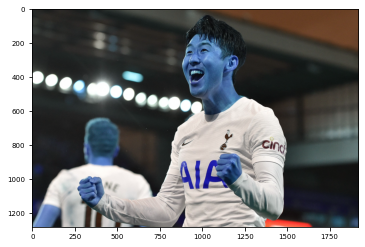

In [ ]:
plt.imshow(img)

In [ ]:
a = img[900:1200, 250:500]

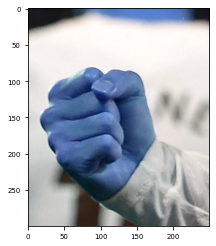

In [ ]:
plt.imshow(a)

In [ ]:
img[900:1200, 700:950] = a

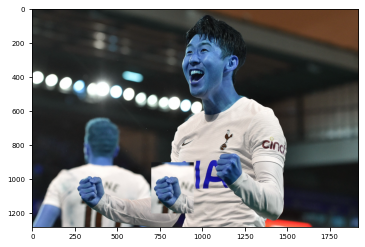

In [ ]:
plt.imshow(img)